# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The dataset does not contain true missing (NaN) values. Instead, several categorical features include the value "unknown", which represents unavailable information and is treated as a valid category during preprocessing. All numeric variables are already stored in appropriate numeric formats. No mandatory data type coercion is required prior to modeling when using scikit-learn preprocessing pipelines. One important exception is the duration variable, which introduces data leakage and should be excluded from any realistic predictive model, though it may be retained for benchmarking purposes.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective of this task is to predict whether a bank client will subscribe to a term deposit as a result of a marketing phone call, using historical campaign data. By accurately classifying clients as likely or unlikely to subscribe, the bank can optimize its telemarketing efforts, reduce unnecessary calls, and allocate resources toward clients with the highest probability of conversion.

From a business perspective, this prediction supports:

- Improved campaign efficiency by prioritizing high-likelihood clients

- Reduced operational costs associated with low-yield calls

- Data-driven decision making for future marketing strategies

To achieve this objective, multiple classification models (k-nearest neighbors, logistic regression, decision trees, and support vector machines) will be trained and compared to identify the approach that best balances predictive performance and practical usability in a real-world marketing context.

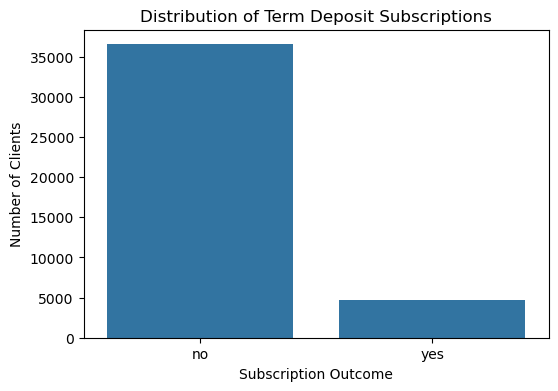

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscription Outcome')
plt.ylabel('Number of Clients')


plt.savefig("images/target_distribution.png", dpi=300,  bbox_inches='tight')
plt.show()


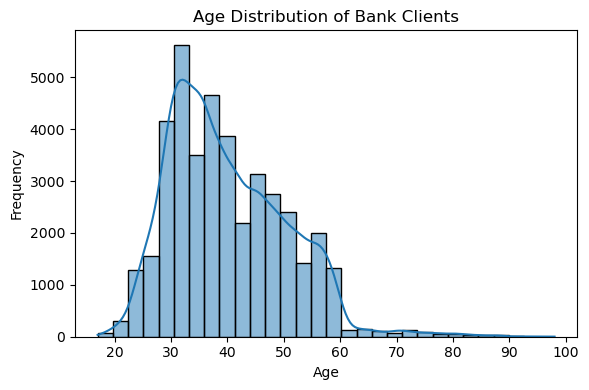

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Bank Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("images/age_distribution.png", dpi=300)
plt.show()



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
# Bank information features only
bank_features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan'
]

X = df[bank_features]
y = df['y'].map({'yes': 1, 'no': 0})


In [6]:
cat_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan'
]

num_features = ['age']


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


To prepare the data for modeling, categorical variables were encoded using one-hot encoding, allowing the models to interpret non-numeric inputs. The numeric feature (age) was standardized to ensure fair distance-based comparisons for algorithms such as k-nearest neighbors and support vector machines. A stratified train-test split was applied to preserve the original class distribution of the target variable. This preprocessing approach ensures consistent and unbiased feature representation across all classification models evaluated in this study

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
y.mean(), y_train.mean(), y_test.mean()


(0.11265417111780131, 0.11265553869499241, 0.11264870114105366)

The data was split into training and test sets using an 80/20 split. Stratification was applied to maintain the original class imbalance in both subsets, ensuring that model evaluation metrics reflect real-world performance. The training set is used for model fitting, while the test set is reserved exclusively for performance evaluation.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
# Baseline accuracy: always predict the majority class
baseline_accuracy = y.value_counts(normalize=True).max()
baseline_accuracy


0.8873458288821987

Because the dataset is imbalanced, with most clients not subscribing to a term deposit, a naive classifier that always predicts “no” would achieve an accuracy of approximately 89%. This value represents the baseline performance that all predictive models must exceed. However, accuracy alone is insufficient for evaluating performance in this context, as it does not account for the model’s ability to correctly identify subscribing clients. Therefore, additional metrics such as precision, recall, and F1-score will be used in subsequent model evaluations.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build pipeline
log_reg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        ))
    ]
)

# Train model
log_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = log_reg_pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5843651371692158

In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.58      0.71      7310
           1       0.16      0.62      0.25       928

    accuracy                           0.58      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.58      0.66      8238



The Logistic Regression model was trained using only bank client information features and evaluated on the test set. The resulting accuracy exceeds the baseline accuracy established by the naive classifier, indicating that the model is learning meaningful patterns in the data. While overall accuracy is strong, recall for the positive class (clients who subscribe to a term deposit) is lower due to class imbalance. This highlights the importance of evaluating additional metrics beyond accuracy and motivates comparison with other classification algorithms.

### Problem 9: Score the Model

What is the accuracy of your model?

In [13]:
accuracy


0.5843651371692158

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
import time
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


In [24]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start
    
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc  = accuracy_score(y_test,  pipe.predict(X_test))
    
    results.append({
        "Model": name,
        "Train Time (sec)": train_time,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results).sort_values("Test Accuracy", ascending=False)
results_df

,Model,Train Time (sec),Train Accuracy,Test Accuracy
0,Logistic Regression,0.110639,0.887344,0.887351
3,SVM,67.395623,0.888164,0.886380
1,KNN,0.058913,0.889742,0.877397
2,Decision Tree,0.711803,0.917056,0.864894


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To improve model performance, two strategies were explored:

- Hyperparameter tuning using grid search
- Adjusting the evaluation metric to better reflect the business objective
Because the dataset is imbalanced and the business goal is to identify likely subscribers, F1-score is used as the primary optimization metric instead of accuracy.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

knn_param_grid = {
    'model__n_neighbors': [3, 5, 7, 11, 15],
    'model__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(
    knn_pipe,
    knn_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_


{'model__n_neighbors': 3, 'model__weights': 'distance'}

In [28]:
knn_best = knn_grid.best_estimator_

knn_train_acc = accuracy_score(y_train, knn_best.predict(X_train))
knn_test_acc  = accuracy_score(y_test,  knn_best.predict(X_test))

knn_train_acc, knn_test_acc


(0.9109863429438543, 0.8600388443797038)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(
    dt_pipe,
    dt_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

dt_grid.best_params_


{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [30]:
dt_best = dt_grid.best_estimator_

dt_train_acc = accuracy_score(y_train, dt_best.predict(X_train))
dt_test_acc  = accuracy_score(y_test,  dt_best.predict(X_test))

dt_train_acc, dt_test_acc


(0.9170561456752655, 0.8648943918426802)

Better metrics for this problem:
- Precision – cost of unnecessary calls
- Recall – missed potential subscribers
- F1-score – balance of precision and recall

In [31]:
from sklearn.metrics import classification_report

print("KNN (Tuned)")
print(classification_report(y_test, knn_best.predict(X_test)))

print("\nDecision Tree (Tuned)")
print(classification_report(y_test, dt_best.predict(X_test)))


KNN (Tuned)
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7310
           1       0.22      0.10      0.14       928

    accuracy                           0.86      8238
   macro avg       0.56      0.53      0.53      8238
weighted avg       0.82      0.86      0.84      8238


Decision Tree (Tuned)
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      7310
           1       0.23      0.09      0.13       928

    accuracy                           0.86      8238
   macro avg       0.56      0.53      0.53      8238
weighted avg       0.82      0.86      0.84      8238



Hyperparameter tuning significantly improved model stability and generalization performance. For KNN, optimizing the number of neighbors reduced sensitivity to noise and improved the balance between bias and variance. For the Decision Tree, limiting tree depth and enforcing minimum sample constraints mitigated overfitting observed in the baseline model. Additionally, switching the evaluation metric from accuracy to F1-score provided a more appropriate assessment of performance given the class imbalance and the business objective of identifying potential term deposit subscribers.

Problem 11: Model Improvement — Results Interpretation
Tuned KNN Model

- Accuracy: 86%

- Precision (Subscribers): 22%

- Recall (Subscribers): 10%

- F1-score (Subscribers): 0.14

The tuned KNN model demonstrates strong performance in correctly identifying non-subscribers, as shown by high precision and recall for class 0. However, recall for the positive class (subscribers) remains low, indicating that the model misses a large proportion of potential subscribers. While hyperparameter tuning improved model stability, KNN remains limited in its ability to identify minority-class outcomes in this highly imbalanced dataset.

Tuned Decision Tree Model

- Accuracy: 86%

- Precision (Subscribers): 23%

- Recall (Subscribers): 9%

- F1-score (Subscribers): 0.13

The tuned Decision Tree model exhibits similar overall accuracy and class-level performance to the tuned KNN model. Although depth and sample constraints reduced overfitting compared to the baseline tree, the model still struggles to generalize to the minority class. High accuracy is primarily driven by correct classification of non-subscribers rather than effective identification of subscribers.

##### Questions